In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

## 1. Conexión y Obtención de Datos

In [2]:
# Conectamos con db servidor
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="jam",
    password="1234"
)

# Obtenenmos un cursor
cursor = cnx.cursor()

# Ejecutamos un query consulta
query = "SELECT * FROM banking_case.customers"
cursor.execute(query)

# fetch (buscamos) un resultado
data = cursor.fetchall()
# Obenenmos nombres de columnas
col_names = [i[0] for i in cursor.description]

# Creamos df con pandas
df = pd.DataFrame(data, columns=col_names)

# Cerramos conexión con db
cnx.close()

df.head()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.62,603617.88,607332.44,12249.96,1134475.25,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.81,229521.38,344635.16,61162.31,2000526.12,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.56,652674.69,203054.34,79071.78,548137.56,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.50,1048157.50,234685.02,57513.65,1148402.25,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


## 2. Análisis Exploratorio de Datos EDA

In [3]:
df.shape

(3000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [5]:
# Generamos estadísticas del df
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034193,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808151,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.475000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.302500,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


### 2.1 Análisis de distribución

In [6]:
# creamos nueva columna llamada Income band
bins = [0, 100000, 300000, float('inf')]
labels = ['low', 'med', 'high']

df['Income band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

In [28]:
# Examinamos la distribución de los valores únicos en variables categóricas
categor_columns = df[['BRId', 'GenderId', 'IAId', 'Amount of Credit Cards', 'Nationality', 'Fee Structure', 'Loyalty Classification', 'Properties Owned', 'Risk Weighting', 'Income band']]

/tmp/ipykernel_17822/1633636602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/1633636602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/1633636602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/1633636602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/1633636602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number

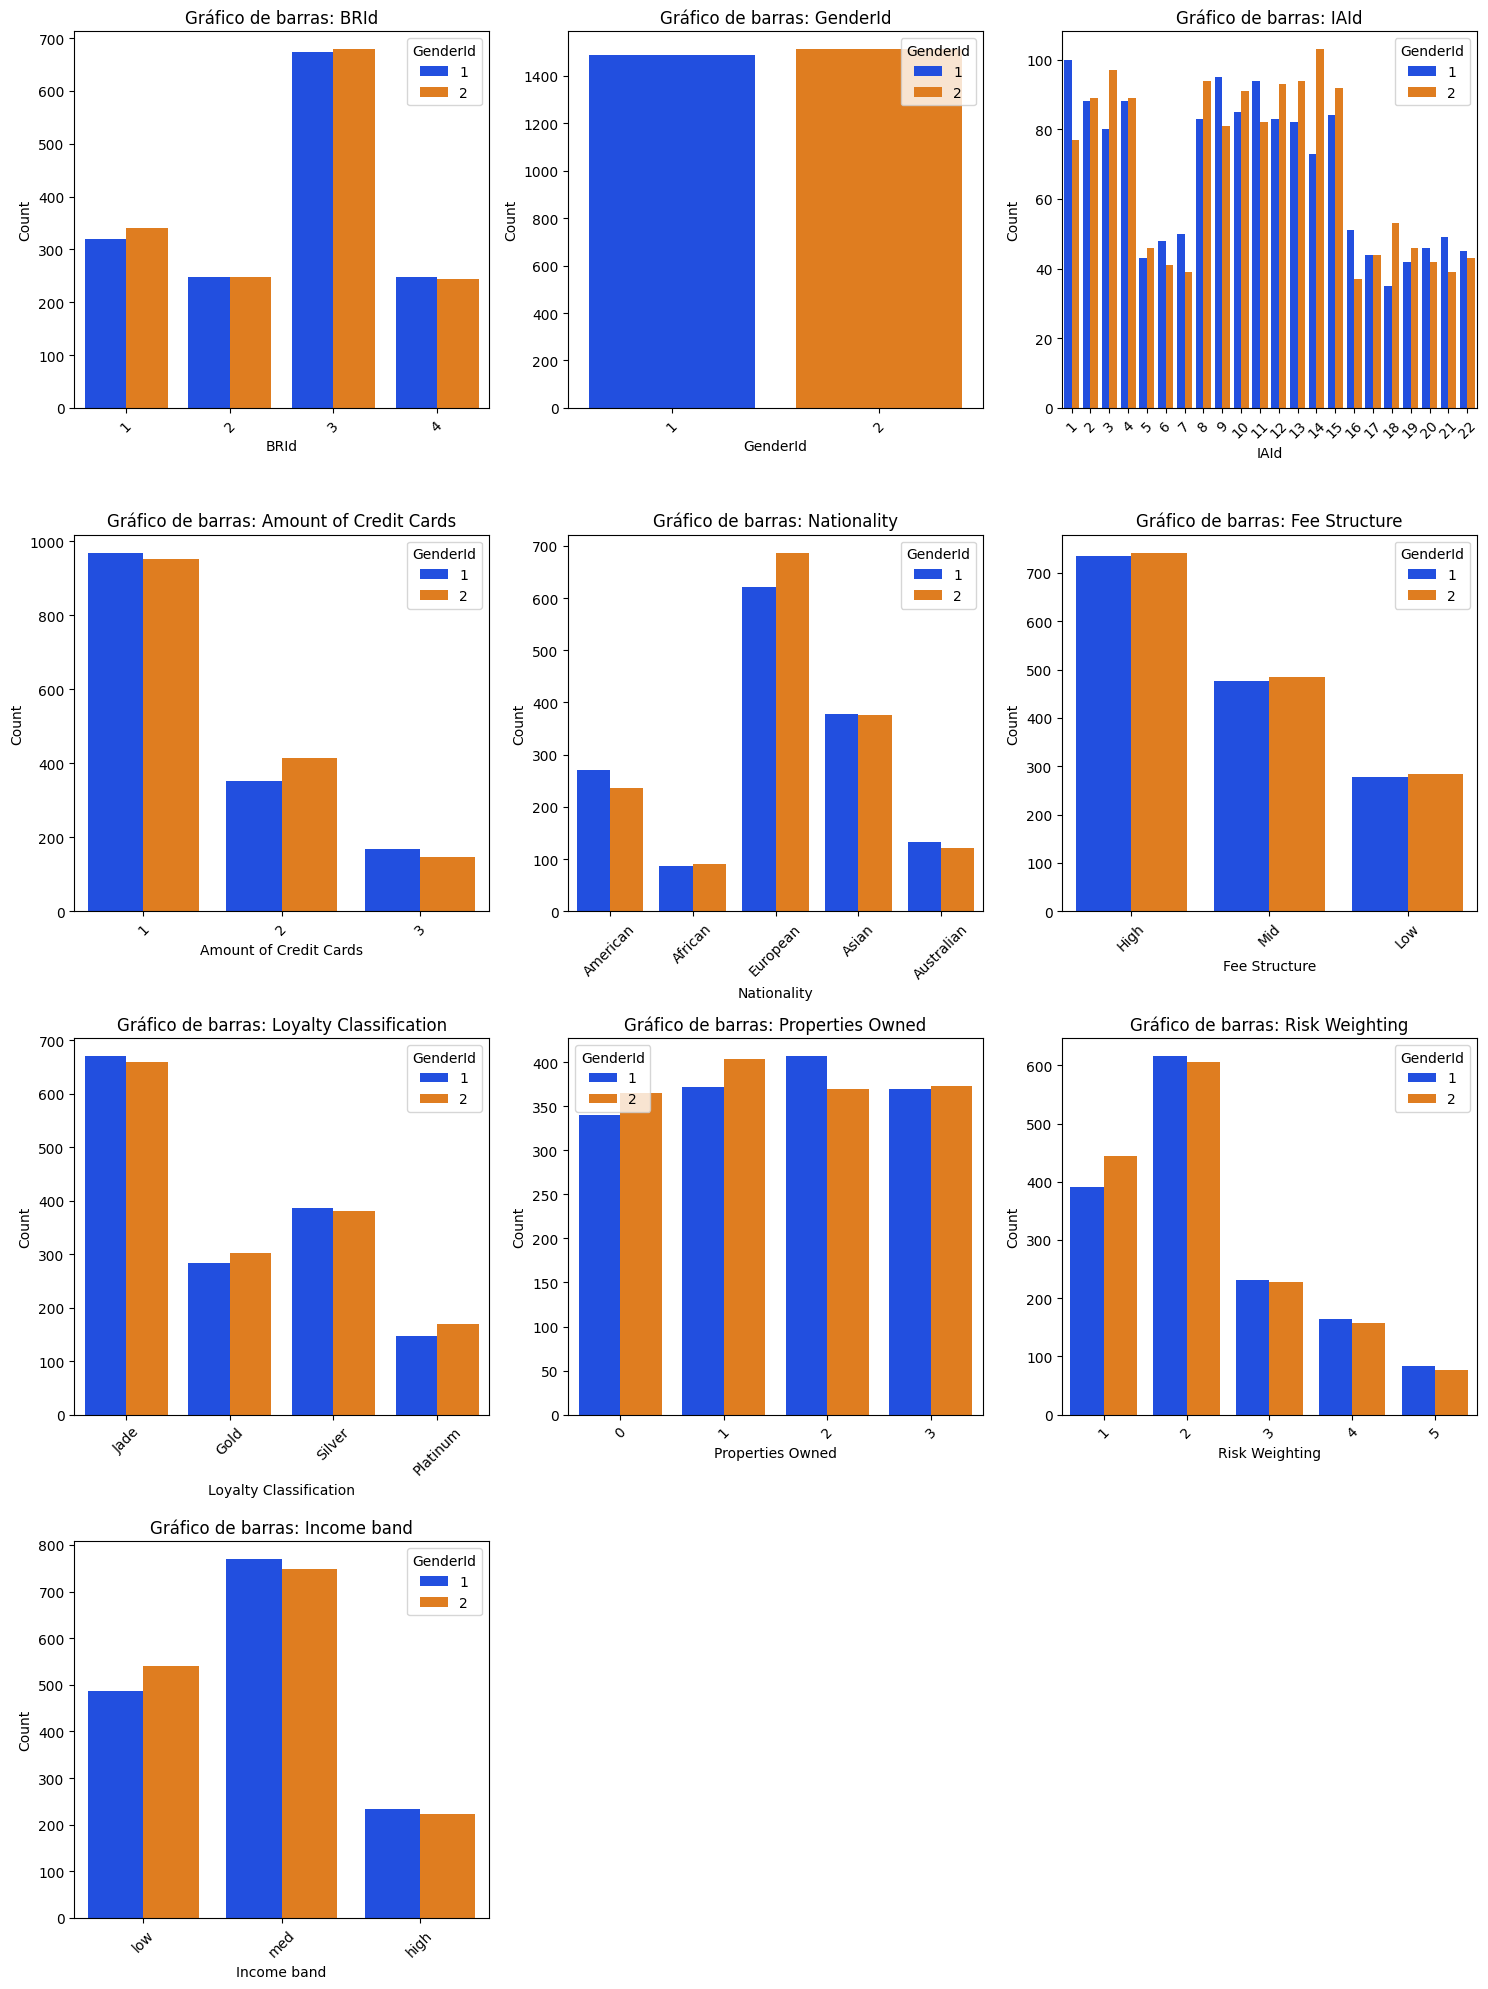

In [38]:
# Análisis de distribución
# Graficamos la distribución de los datos de las variables categóricas

# Definimos tamaño de grilla
n_cols = 3
n_rows = (len(categor_columns.columns) +  n_cols - 1) // n_cols

# Creamos figura y axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,5 * n_rows))
axes = axes.flatten()

# Iteramos a través de las columnas del df
for i, column in enumerate(categor_columns.columns):
    ax = axes[i]
    # Gráfico de barras columnas categóricas discriminadas por GenderId
    sns.countplot(data=categor_columns, x=column,hue='GenderId', ax=ax, palette='bright')
    ax.set_title(f"Gráfico de barras: {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel("Count")

# Removemos subplots vacios si hay
for j in range(len(categor_columns.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_17822/3571056067.py:18: UserWarning: set_ticklabels() should only be used with a fixed number

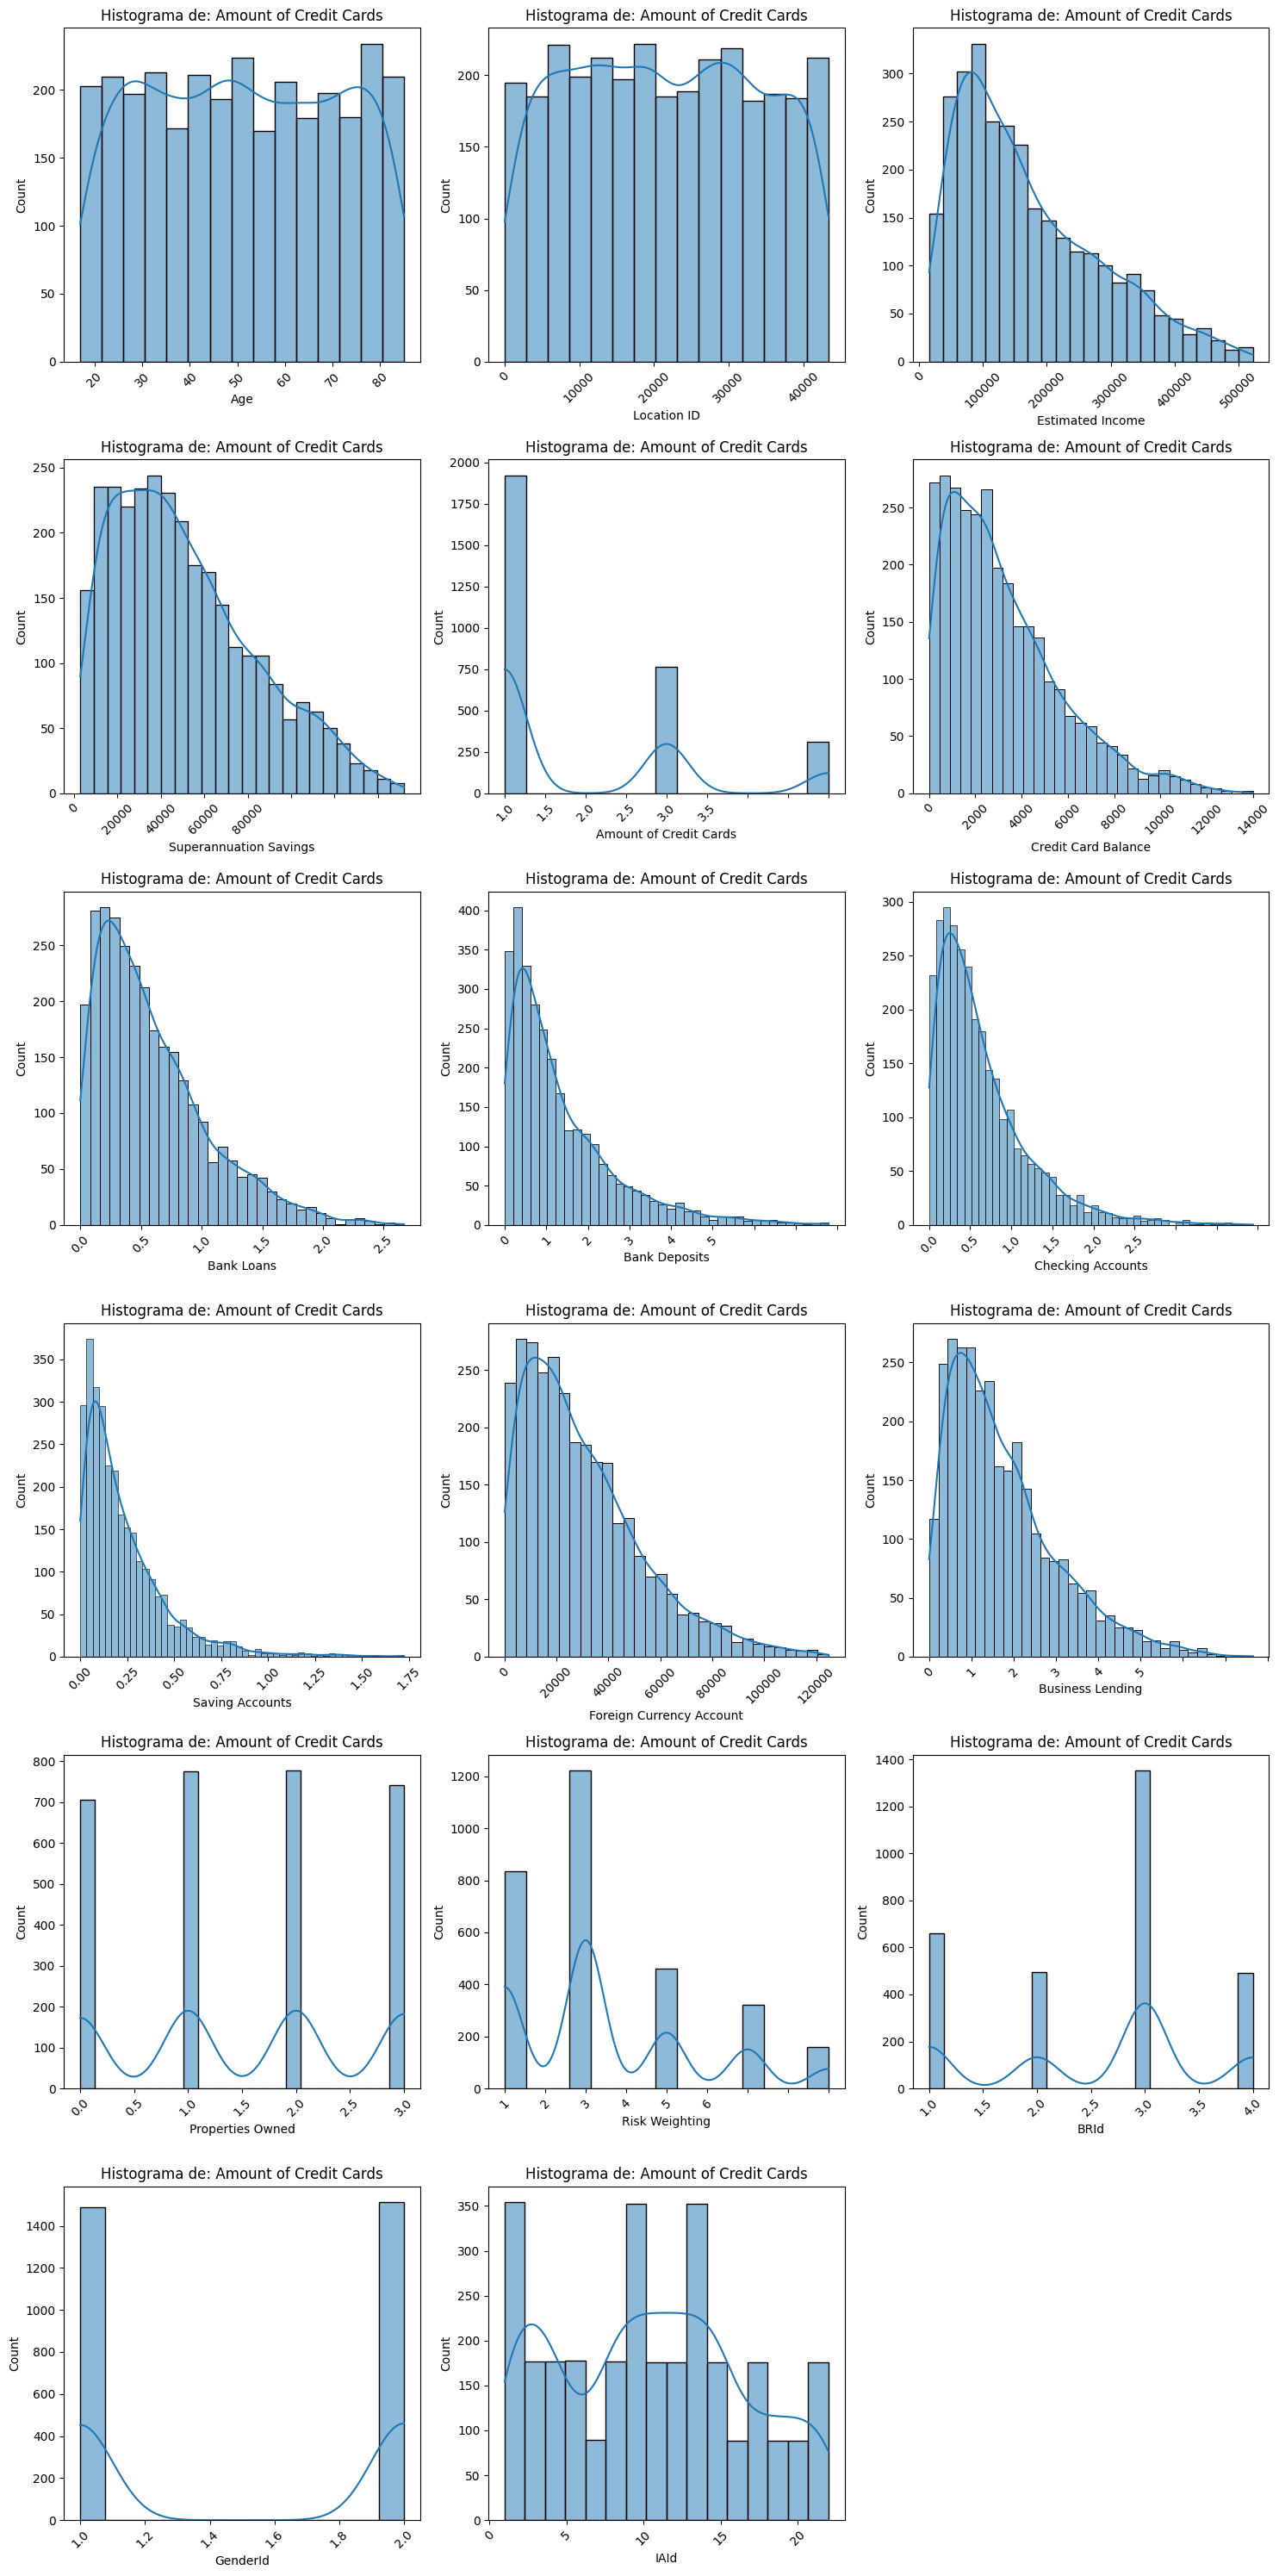

In [41]:
# Análisis de distribución
# Graficamos la distribución de los datos de las variables categóricas
numeric_cols = df.select_dtypes(include=np.number).columns
# Definimos tamaño de grilla
n_cols = 3
n_rows = (len(numeric_cols) +  n_cols - 1) // n_cols

# Creamos figura y axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,5 * n_rows))
axes = axes.flatten()

# Iteramos a través de las columnas del df
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    # HIstograma de variables numéricas
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Histograma de: {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel("Count")

# Removemos subplots vacios si hay
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()